In [2]:
import pandas as pd 
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df1 = pd.read_csv('agri1.csv', encoding='latin-1')
df2 = pd.read_csv('finance1.csv', encoding='latin-1')
df3 = pd.read_csv('multisector1.csv', encoding='latin-1')
df4 = pd.read_csv('power1.csv', encoding='latin-1')
df5 = pd.read_csv('transport1.csv', encoding='latin-1')

In [6]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         1059 non-null   object
 1   Title                1058 non-null   object
 2   Commitment in U.A    1058 non-null   object
 3   Country              1058 non-null   object
 4   Starting Date        1058 non-null   object
 5   Status               1058 non-null   object
 6   Source of Financing  1056 non-null   object
 7   Sector               1058 non-null   object
 8   Sovereign            1052 non-null   object
dtypes: object(9)
memory usage: 78.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitmen

In [7]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)
df5.dropna(inplace=True)

In [8]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1109
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         1049 non-null   object
 1   Title                1049 non-null   object
 2   Commitment in U.A    1049 non-null   object
 3   Country              1049 non-null   object
 4   Starting Date        1049 non-null   object
 5   Status               1049 non-null   object
 6   Source of Financing  1049 non-null   object
 7   Sector               1049 non-null   object
 8   Sovereign            1049 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitmen

In [10]:
df1['Starting Date'] = pd.to_datetime(df1['Starting Date'])
df2['Starting Date'] = pd.to_datetime(df2['Starting Date'])
df3['Starting Date'] = pd.to_datetime(df3['Starting Date'])
df4['Starting Date'] = pd.to_datetime(df4['Starting Date'])
df5['Starting Date'] = pd.to_datetime(df5['Starting Date'])



df1['Starting_Year'] = df1['Starting Date'].dt.year
df2['Starting_Year'] = df2['Starting Date'].dt.year
df3['Starting_Year'] = df3['Starting Date'].dt.year
df4['Starting_Year'] = df4['Starting Date'].dt.year
df5['Starting_Year'] = df5['Starting Date'].dt.year

ag = df1[df1['Starting_Year'] == 2019]
fi = df2[df2['Starting_Year'] == 2019]
mu = df3[df3['Starting_Year'] == 2019]
po = df4[df4['Starting_Year'] == 2019]
tr = df5[df5['Starting_Year'] == 2019]

In [13]:
agr = ag.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
fin = fi.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
mul = mu.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
por = po.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
tra = tr.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
data = [agr, fin, mul, por, tra]
df = pd.concat(data)

df['Commitment in U.A'] = df['Commitment in U.A'].str.replace(r',', '')
df['Commitment in U.A'] = df['Commitment in U.A'].apply(pd.to_numeric)
df.info()
df.to_csv('mydata.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 15 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  153 non-null    float64
 1   Country            153 non-null    object 
 2   Sector             153 non-null    object 
 3   Starting_Year      153 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.0+ KB


In [14]:
df =pd.read_csv('mydata.csv')
df.head()

,Unnamed: 0,Commitment in U.A,Country,Sector,Starting_Year
0,15,14182000.00,Mali,Agriculture and Rural Development,2019
1,16,36180178.97,Senegal,Agriculture and Rural Development,2019
2,17,94322475.32,Cote d'Ivoire,Agriculture and Rural Development,2019
3,18,43904259.44,Sudan,Agriculture and Rural Development,2019
4,20,13120000.00,Eritrea,Agriculture and Rural Development,2019


In [16]:
df1_agri = df.query('Sector == "Agriculture and Rural Development"')
df1_fin = df.query('Sector == "Finance"')
df1_tra = df.query('Sector == "Transport"')
df1_mul = df.query('Sector == "Multi-Sector"')
df1_pow = df.query('Sector == "Power"')


<AxesSubplot:xlabel='Country'>

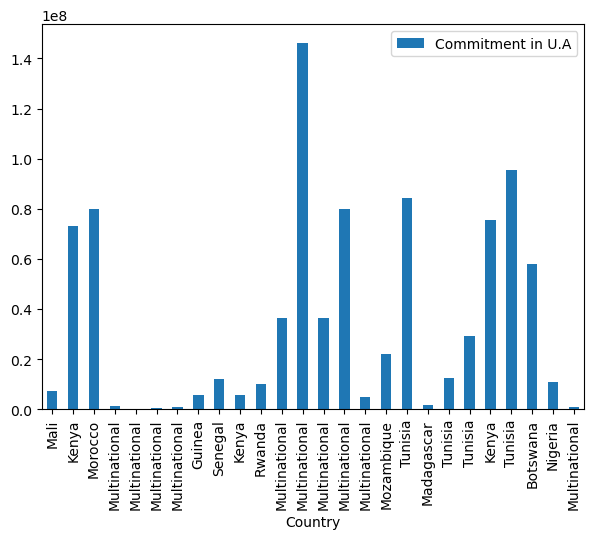

In [25]:
df1_fin.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (7,5))

<AxesSubplot:xlabel='Country'>

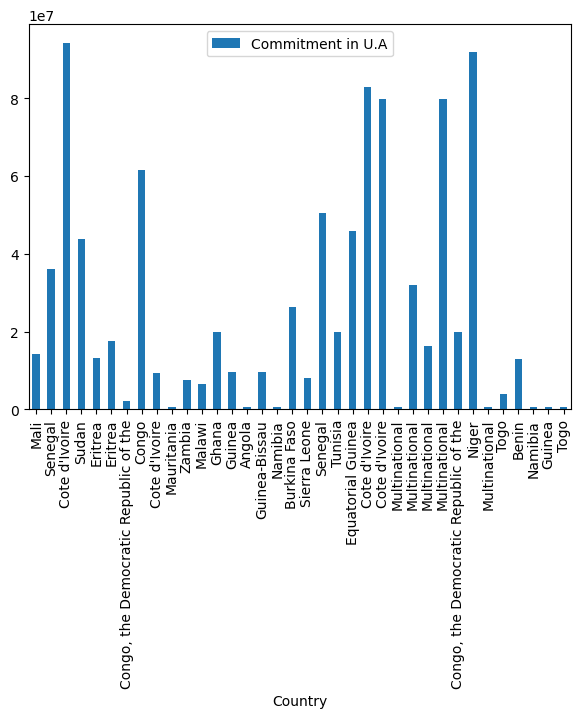

In [24]:
df1_agri.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (7,5))

<AxesSubplot:xlabel='Country'>

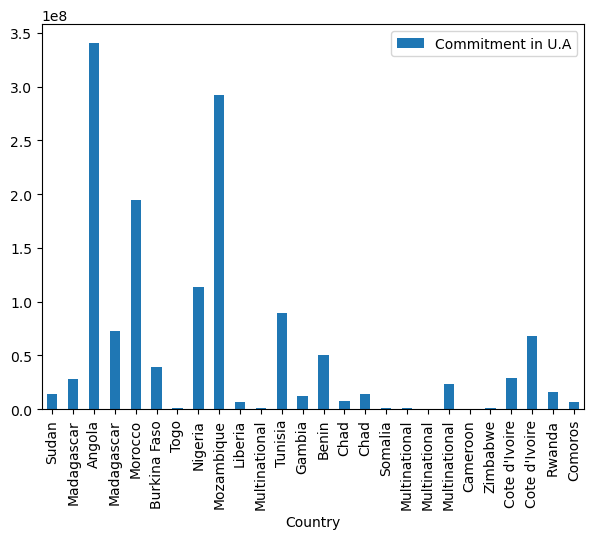

In [26]:
df1_pow.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (7,5))

<AxesSubplot:xlabel='Country'>

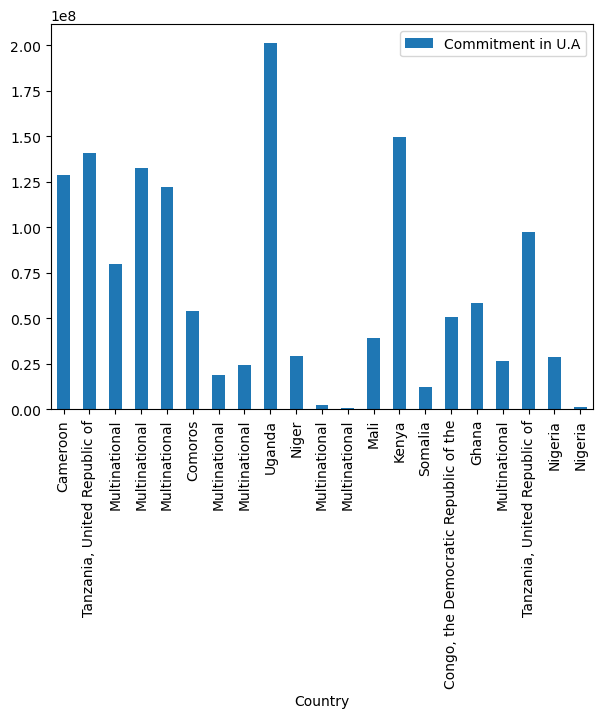

In [27]:
df1_tra.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (7,5))

<AxesSubplot:xlabel='Country'>

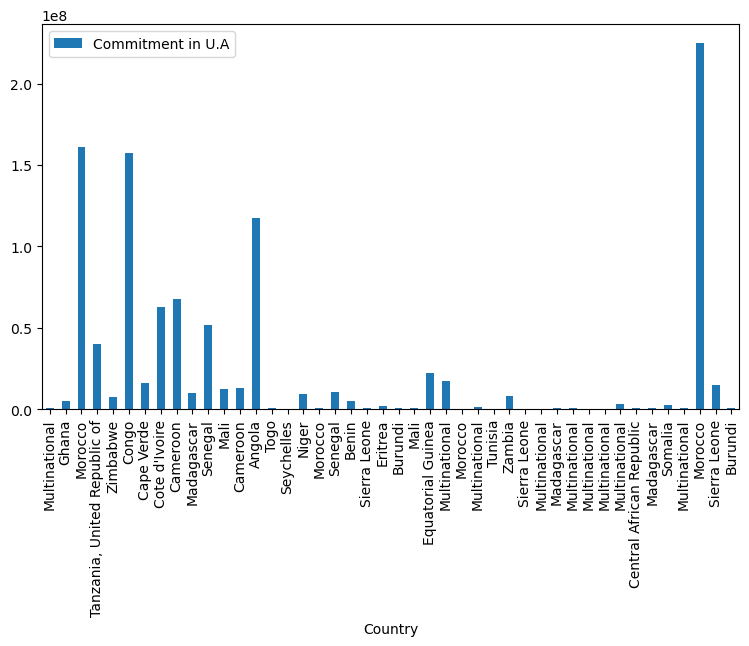

In [29]:
df1_mul.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (9,5))

In [30]:
xm = df1_mul['Commitment in U.A'].sum()
xt = df1_tra['Commitment in U.A'].sum()
xp = df1_pow['Commitment in U.A'].sum()
xa = df1_agri['Commitment in U.A'].sum()
xf = df1_fin['Commitment in U.A'].sum()
yf1 = df1_fin.query('Country == "Multinational"')
yf2 = df1_fin.query('Country == "Morocco"')
yf3 = df1_fin.query('Country == "Kenya"')
multinational_percent = (yf1['Commitment in U.A'].sum() / xf) * 100
morocco1_percent = (yf2['Commitment in U.A'].sum() / xf) * 100
kenya1_percent = (yf3['Commitment in U.A'].sum() / xf) * 100
ya1 = df1_agri.query('Country == "Côte d\'Ivoire"')
ya2 = df1_agri.query('Country == "Congo"')
ya3 = df1_agri.query('Country == "Sudan"')
cote_percent = (ya1['Commitment in U.A'].sum() / xa) * 100
congo_percent = (ya2['Commitment in U.A'].sum() / xa) * 100
sudan_percent = (ya3['Commitment in U.A'].sum() / xa) * 100
yp1 = df1_pow.query('Country == "Angola"')
yp2 = df1_pow.query('Country == "Mozambique"')
yp3 = df1_pow.query('Country == "Morocco"')
angola_percent = (yp1['Commitment in U.A'].sum() / xp) * 100
mozambique_percent = (yp2['Commitment in U.A'].sum() / xp) * 100
morocco2_percent = (yp3['Commitment in U.A'].sum() / xp) * 100
yt1 = df1_tra.query('Country == "Uganda"')
yt2 = df1_tra.query('Country == "Kenya"')
yt3 = df1_tra.query('Country == "Tanzania, United Republic of"')
uganda_percent = (yt1['Commitment in U.A'].sum() / xt) * 100
kenya2_percent = (yt2['Commitment in U.A'].sum() / xt) * 100
tanzania_percent = (yt3['Commitment in U.A'].sum() / xt) * 100
ym1 = df1_mul.query('Country == "Niger"')
ym2 = df1_mul.query('Country == "Rwanda"')
ym3 = df1_mul.query('Country == "Madagascar"')
niger_percent = (ym1['Commitment in U.A'].sum() / xm) * 100
rwanda_percent = (ym2['Commitment in U.A'].sum() / xm) * 100
madagascar_percent = (ym3['Commitment in U.A'].sum() / xm) * 100

In [31]:
rest_finance = 100 - (multinational_percent + morocco1_percent + kenya1_percent)
rest_agriculture = 100 - (cote_percent + congo_percent + sudan_percent)
rest_power = 100 - (angola_percent + mozambique_percent + morocco2_percent)
rest_transport = 100 - (uganda_percent + kenya2_percent + tanzania_percent)
rest_multi = 100 - (niger_percent + rwanda_percent + madagascar_percent)

In [32]:
dfchart1 = pd.DataFrame({'finance sector':[multinational_percent, morocco1_percent, kenya1_percent, rest_finance]}, index = ['Multinational', 'Morocco', 'Kenya', 'Rest of Africa'])
dfchart2 = pd.DataFrame({'agriculture sector': [cote_percent, congo_percent, sudan_percent, rest_agriculture]}, index = ['Cote d\'Ivoire', 'Congo', 'Sudan', 'Rest of Africa'])
dfchart3 = pd.DataFrame({'power sector': [angola_percent, mozambique_percent, morocco2_percent, rest_power]}, index = ['Angola', 'Mozambique', 'Morocco', 'Rest of Africa'])
dfchart4 = pd.DataFrame({'transport sector': [uganda_percent, kenya2_percent, tanzania_percent, rest_transport]}, index = ['Uganda', ' Kneya', 'Tanzania', 'Rest of Africa'])
dfchart5 = pd.DataFrame({'multi sector': [niger_percent, rwanda_percent, madagascar_percent, rest_multi]}, index = ['Niger', 'Rwanda', 'Madagascar', 'Rest of Africa'])

<AxesSubplot:ylabel='finance sector'>

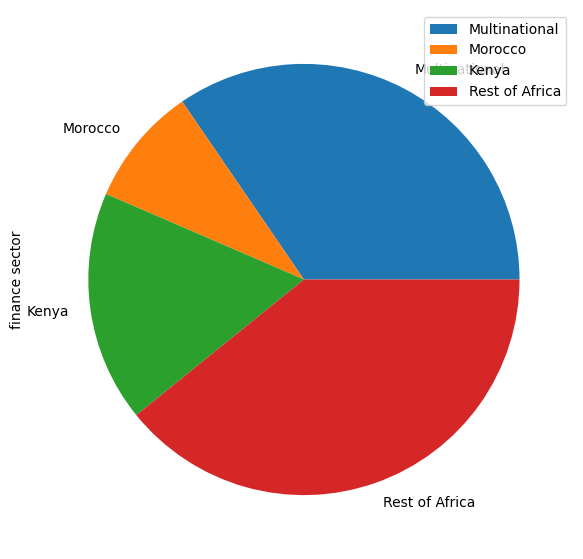

In [34]:
dfchart1.plot.pie(y = 'finance sector', figsize = (7,7))

<AxesSubplot:ylabel='agriculture sector'>

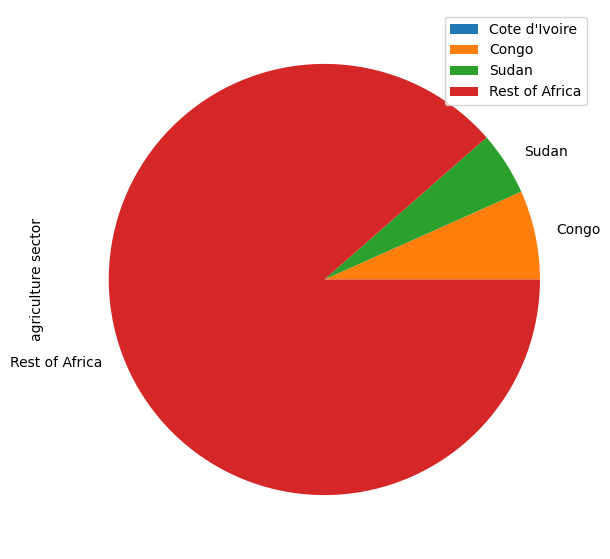

In [35]:
dfchart2.plot.pie(y = 'agriculture sector', figsize = (7,7))

<AxesSubplot:ylabel='power sector'>

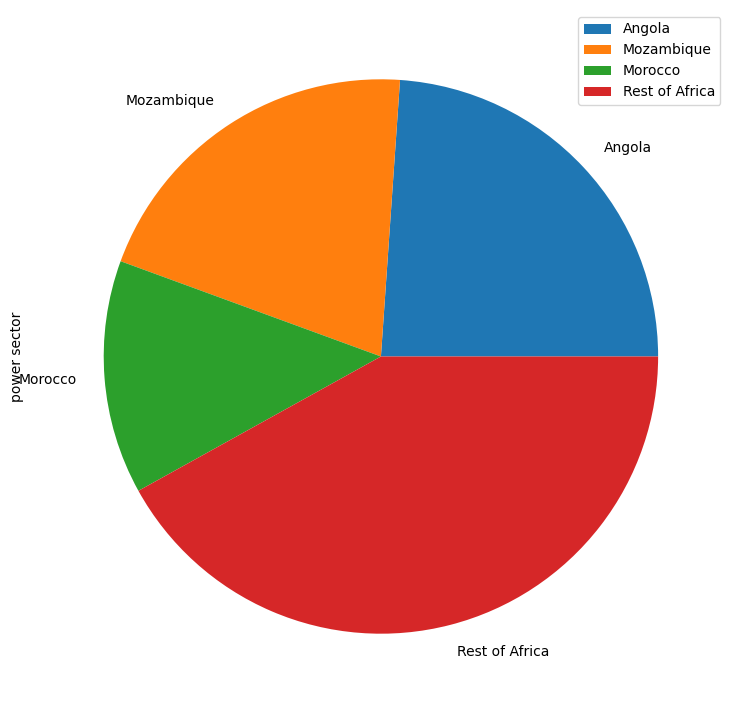

In [37]:
dfchart3.plot.pie(y = 'power sector', figsize = (9,9))

<AxesSubplot:ylabel='transport sector'>

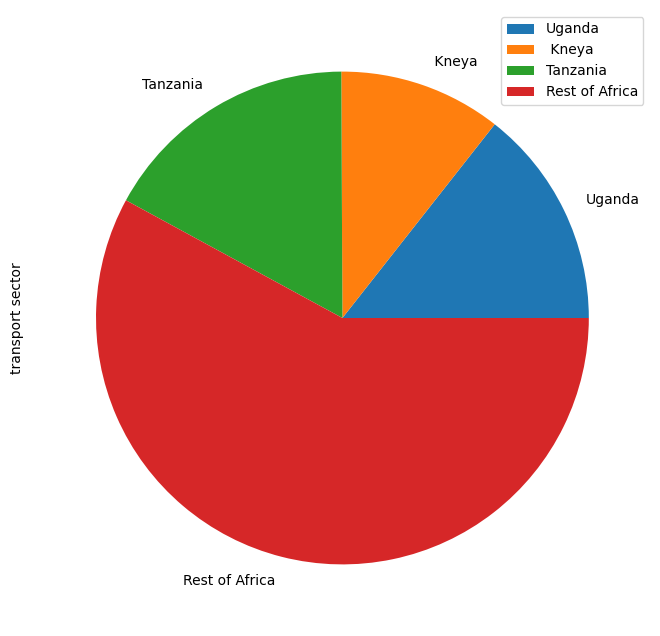

In [38]:
dfchart4.plot.pie(y = 'transport sector', figsize = (8,8))

<AxesSubplot:ylabel='multi sector'>

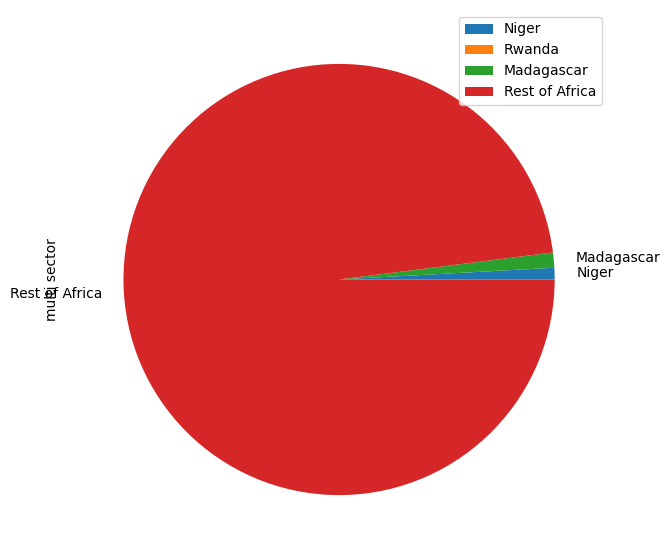

In [42]:
dfchart5.plot.pie(y = 'multi sector', figsize = (7,7))